In [134]:
import pandas as pd

##loading the data

In [135]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nlp_restaurant/Restaurant reviews.csv')

In [136]:
df = df[['Review','Rating']]
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


##data preproceesing
handling null values

In [137]:
df.isnull().sum()

Review    45
Rating    38
dtype: int64

In [138]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

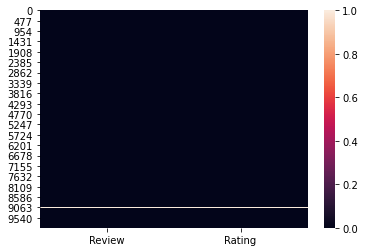

In [139]:
import seaborn as sns
sns.heatmap(df.isnull())

In [140]:
df = df.dropna(axis=0)

In [141]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [142]:
df[df['Rating'] == 'Like']

,Review,Rating
7601,One of the best pizzas to try. It served with ...,Like


In [143]:
df = df.drop(7601)

In [144]:
df['Rating'] = df['Rating'].astype('float32')

In [145]:
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4.0


In [146]:
import seaborn as sns

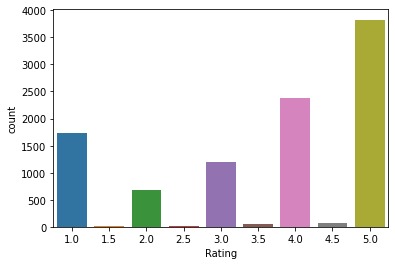

In [147]:
sns.countplot(df['Rating'])

###creating label column with o as negetive and 1 as positive

In [148]:
value = []
for x in df['Rating'].values:
  if x <= 2.5:
    x = 0
  else :
    x = 1
  value.append(x)
df['label'] = value

In [149]:
df


,Review,Rating,label
0,"The ambience was good, food was quite good . h...",5.0,1
1,Ambience is too good for a pleasant evening. S...,5.0,1
2,A must try.. great food great ambience. Thnx f...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,1
...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,1
9996,This place has never disappointed us.. The foo...,4.5,1
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,0
9998,I personally love and prefer Chinese Food. Had...,4.0,1


In [150]:
df = df.drop(['Rating'],axis=1)

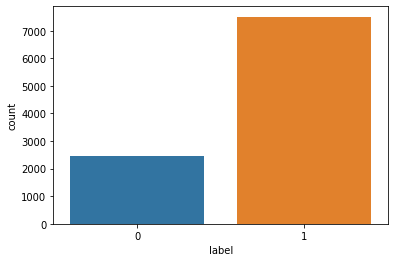

In [151]:
sns.countplot(df['label'])

##text preprocessing

In [152]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [154]:
lem = WordNetLemmatizer()

In [155]:
import re
corpus = []
i = 1
for text in df['Review'] :
  text = re.sub('[^a-zA-z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [lem.lemmatize(word)  for word in text if word  not in set(stopwords.words('english'))]
  text = ' '.join(text)
  corpus.append(text)

In [156]:
y = df['label']

In [157]:
y.shape

(9954,)

In [158]:
import tensorflow
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

###tokenizing and padding the data to give it to the embedding layer

In [159]:
tokenizer = Tokenizer(nb_words=10000, split=' ')
tokenizer.fit_on_texts(corpus)
X1 = tokenizer.texts_to_sequences(corpus)
X1 = pad_sequences(X1,maxlen=20,padding='post',truncating='post')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


building the stacked lstm model

In [160]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim = 64,input_length=20))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16, ))
model.add(Dense(1,activation='sigmoid'))

In [161]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [162]:
model.fit(X1,y,batch_size=64,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
125/125 - 6s - loss: 0.1086 - accuracy: 0.8541 - val_loss: 0.1009 - val_accuracy: 0.8553
Epoch 2/5
125/125 - 5s - loss: 0.0661 - accuracy: 0.9133 - val_loss: 0.0957 - val_accuracy: 0.8649
Epoch 3/5
125/125 - 5s - loss: 0.0549 - accuracy: 0.9285 - val_loss: 0.1083 - val_accuracy: 0.8654
Epoch 4/5
125/125 - 5s - loss: 0.0481 - accuracy: 0.9390 - val_loss: 0.1179 - val_accuracy: 0.8579
Epoch 5/5
125/125 - 5s - loss: 0.0433 - accuracy: 0.9452 - val_loss: 0.1099 - val_accuracy: 0.8473
